In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
employees_left = df[df['left']==1]
employees_left.shape

(3571, 10)

In [ ]:
employees_retained = df[df['left']==0]
employees_retained.shape

(11428, 10)

In [ ]:
# impact of variable (if employee will left or not)
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
#we can see that employee lefting are due to high number of time_spend_company and average_monthly_hours , and lack of promotion_last_5years

In [ ]:
#Impact of Employee Salaries on Retention

left_count = df.groupby(['salary', 'left']).size().reset_index(name='count')
left_count.head()

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129


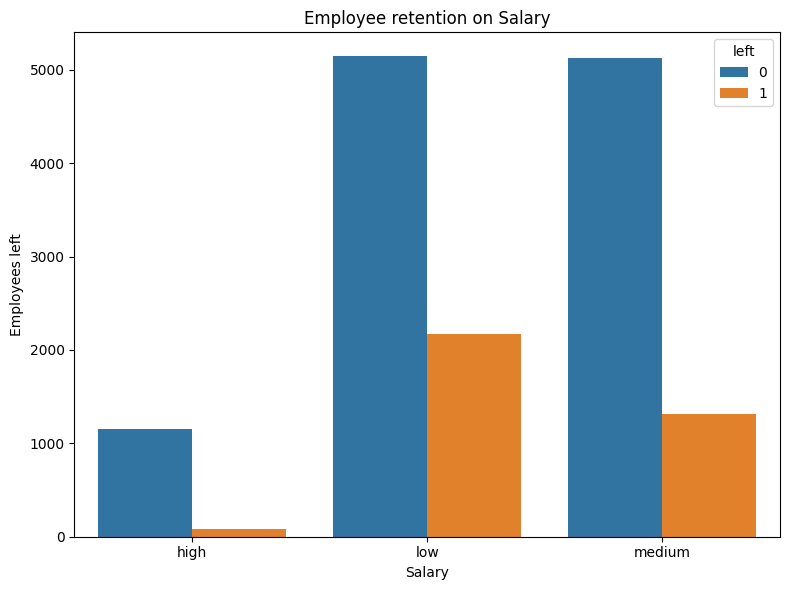

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='salary', y='count', hue='left', data=left_count, errorbar=None)
plt.xlabel('Salary')
plt.ylabel('Employees left')
plt.title('Employee retention on Salary')
plt.tight_layout()
plt.show()

In [ ]:
#Corelation between Department and Employee Retention

left_per_dept = df.groupby(['Department', 'left']).size().reset_index(name='count')
left_per_dept.head()

,Department,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563


In [ ]:
# logistic regression model

df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [ ]:
#changing salary into integer
salary_new = pd.get_dummies(df1.salary, prefix='salary')
salary_new.head()


,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [ ]:
salary_new = salary_new.astype(int)
salary_new.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [ ]:
df_with_new = pd.concat([df1, salary_new], axis='columns')
df_with_new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [ ]:
#droping original salary coloumn
df_with_new.drop('salary', axis='columns', inplace=True)
df_with_new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
X = df_with_new
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
y = df.left
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
1451,0.78,260,0,0,1,0
8625,0.79,171,0,0,1,0
1808,0.36,136,0,0,1,0
13771,0.20,261,0,0,0,1
10251,0.56,248,0,0,0,1
...,...,...,...,...,...,...
5232,0.32,162,0,0,1,0
810,0.84,236,0,0,0,1
12335,0.45,151,0,0,0,1
1843,0.41,147,0,0,1,0


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#accuracy

model.score(X_test, y_test)

0.7673333333333333

In [ ]:
probability = model.predict_proba(X_test)
probability

array([[0.90109364, 0.09890636],
       [0.75811366, 0.24188634],
       [0.92806601, 0.07193399],
       ...,
       [0.40705133, 0.59294867],
       [0.58697592, 0.41302408],
       [0.71958816, 0.28041184]])